In [96]:
import ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.colors import ListedColormap
import math

df = pd.read_csv("Cleaned_DF.csv")

In [97]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [98]:
mask1 = (df['CryoSleep'] == 0)&(df['route']>3.5)&(df['Age']>12.5)
features = ['Age','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Deck','Num','Side','route']
dz = df[mask1][features+["Transported"]]
dz.shape

(1921, 12)

In [201]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#X = dz.drop("Transported",axis = 1)
y = dz["Transported"]
X = dz[features]
#X = dz[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]
X_std = sc.fit_transform(X)
X_std

array([[ 0.36973726, -0.29625828, -0.54131821, ..., -0.83412407,
        -1.00888906,  1.13923301],
       [ 1.91308587,  3.37543307, -0.50077521, ..., -0.83412407,
         0.99118926,  1.13923301],
       [-0.11763599, -0.29625828, -0.54131821, ..., -0.83412407,
         0.99118926,  1.13923301],
       ...,
       [ 0.53219501,  3.37543307, -0.54131821, ..., -0.60168803,
        -1.00888906,  0.43418578],
       [-0.19886486, -0.29625828, -0.54131821, ...,  0.60792804,
         0.99118926,  0.43418578],
       [ 0.77588163, -0.29625828, -0.4225178 , ...,  0.60792804,
         0.99118926,  1.13923301]])

In [202]:
cov_mat = np.cov(X_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nСобственные значения\n%s' % eigen_vals)


Собственные значения
[2.95875491 0.22473679 0.436239   0.7369121  1.07680689 1.03303625
 0.98274377 0.97057734 0.83849652 0.88641111 0.86101449]


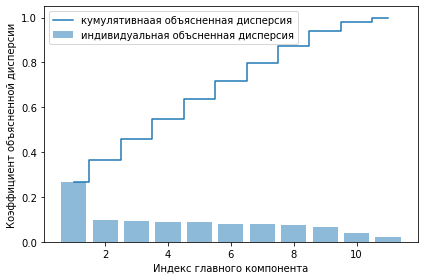

In [203]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted (eigen_vals,reverse= True)]
cum_var_exp = np.cumsum(var_exp)

size = len(eigen_vals)+1

plt.bar (range(1,size),var_exp, alpha = 0.5, align = 'center', label = 'индивидуальная объсненная дисперсия')
plt.step(range(1,size),cum_var_exp,where = 'mid',label = 'кумулятивнаая объясненная дисперсия')
plt.ylabel('Коэффициент объясненной дисперсии')
plt.xlabel('Индекс главного компонента')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [204]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(key=lambda k: k[0], reverse =True)


In [205]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))
print('Матрица W:\n', w)

Матрица W:
 [[ 0.15829525  0.51457492]
 [ 0.09703148  0.55661016]
 [-0.24957444  0.30460241]
 [ 0.3185423  -0.00058346]
 [-0.12361751 -0.54826611]
 [ 0.2205258  -0.05116095]
 [ 0.25831834 -0.00535238]
 [-0.50567396  0.05981836]
 [-0.40104554  0.07531267]
 [ 0.04566063 -0.1025879 ]
 [ 0.50249483 -0.0979719 ]]


In [206]:
X_pca = X_std.dot(w)

<function matplotlib.pyplot.show(close=None, block=None)>

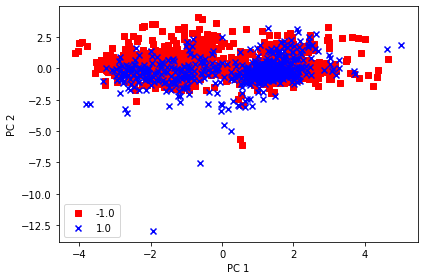

In [207]:
colors = ['r','b']
markers = ['s','x']
for l,c,m in zip(np.unique(y),colors, markers):
    plt.scatter(X_pca[y == l, 0],X_pca[y == l, 1],c = c, label = l, marker = m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show

In [208]:
pca_df = pd.DataFrame(X_pca,index = dz.index,columns = ['par1','par2'])
pca_df["Transported"] = y

pca_df.head(20)

,par1,par2,Transported
0,1.266179,-0.047298,-1.0
2,3.372752,2.392148,-1.0
3,2.066801,-0.814268,-1.0
11,1.725925,-0.022979,1.0
12,-1.244262,-0.543579,1.0
25,-0.878466,-0.274022,-1.0
28,1.389562,-0.182867,-1.0
29,-1.252067,0.725405,-1.0
31,-0.982499,-0.025503,1.0
34,-0.947144,-0.166100,-1.0


In [209]:
pca_df.shape

(1921, 3)

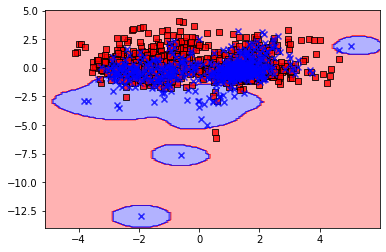

In [216]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 1.0, C = 1.0)
ppn_test = svm.fit(X_pca,y)
ds.plot_decision_regions(X_pca,y,classifier = ppn_test,resolution = 0.1)

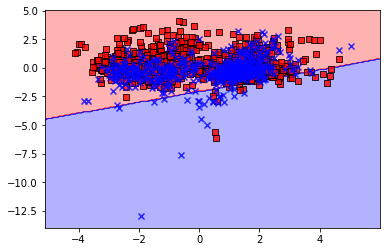

In [217]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs')
ppn_test = lr.fit(X_pca,y)
ds.plot_decision_regions(X_pca,y,classifier = ppn_test,resolution = 0.1)

test size:  576 , total errors in test: 34.03%
index = predicted, columns = factual, in %:
         -1        1
-1  65.9722  34.0278
 1        0        0


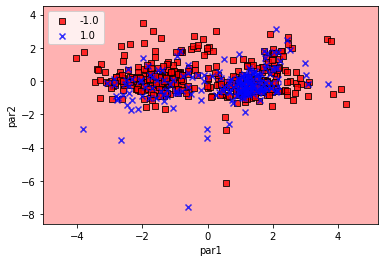

In [123]:
ppn = ds.divide_frame(pca_df,['par1','par2'],'Transported',classifier = 'SVC', kernel_ ='rbf',gamma_ = 0.1, c = 0.1,degree_ = 2,random_state_sample = 1,random_state_ppn = 1, fraction = 0.7,plot = True,res = 0.02, show_value = 0)

/Users/sergey/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/sergey/Dropbox/GitHub/spaceship/spaceship-1/ds.py:141: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0
/Users/sergey/Dropbox/GitHub/spaceship/spaceship-1/ds.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr[i] = 0


test size:  384 , total errors in test: 55.47%
index = predicted, columns = factual, in %:
         -1        1
-1   34.375  23.6979
 1  31.7708  10.1562
     w =  [ 6.84491759e+271 -2.94013756e+273 -1.20913961e+270]


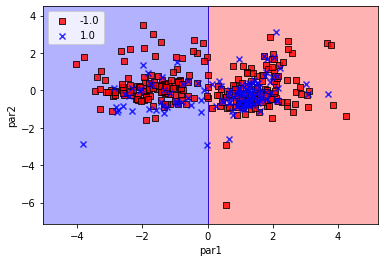

In [142]:
ppn = ds.divide_frame(pca_df,['par1','par2'],'Transported',classifier = 'Adaline',eta = 0.001, iter = 500,random_state_sample = 1,random_state_ppn = 2, fraction = 0.8,plot = True,res = 0.02)

test size:  576 , total errors in test: 33.51%
index = predicted, columns = factual, in %:
         -1        1
-1  63.7153    31.25
 1  2.25694  2.77778


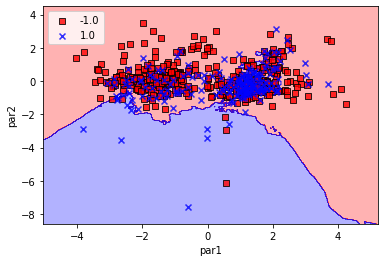

In [149]:
ppn = ds.divide_frame(pca_df,['par1','par2'],'Transported',classifier = 'KNN',neighbors = 50, dimension  = 2, random_state_sample = 1,random_state_ppn = 2, fraction = 0.7,plot = True,res = 0.02)

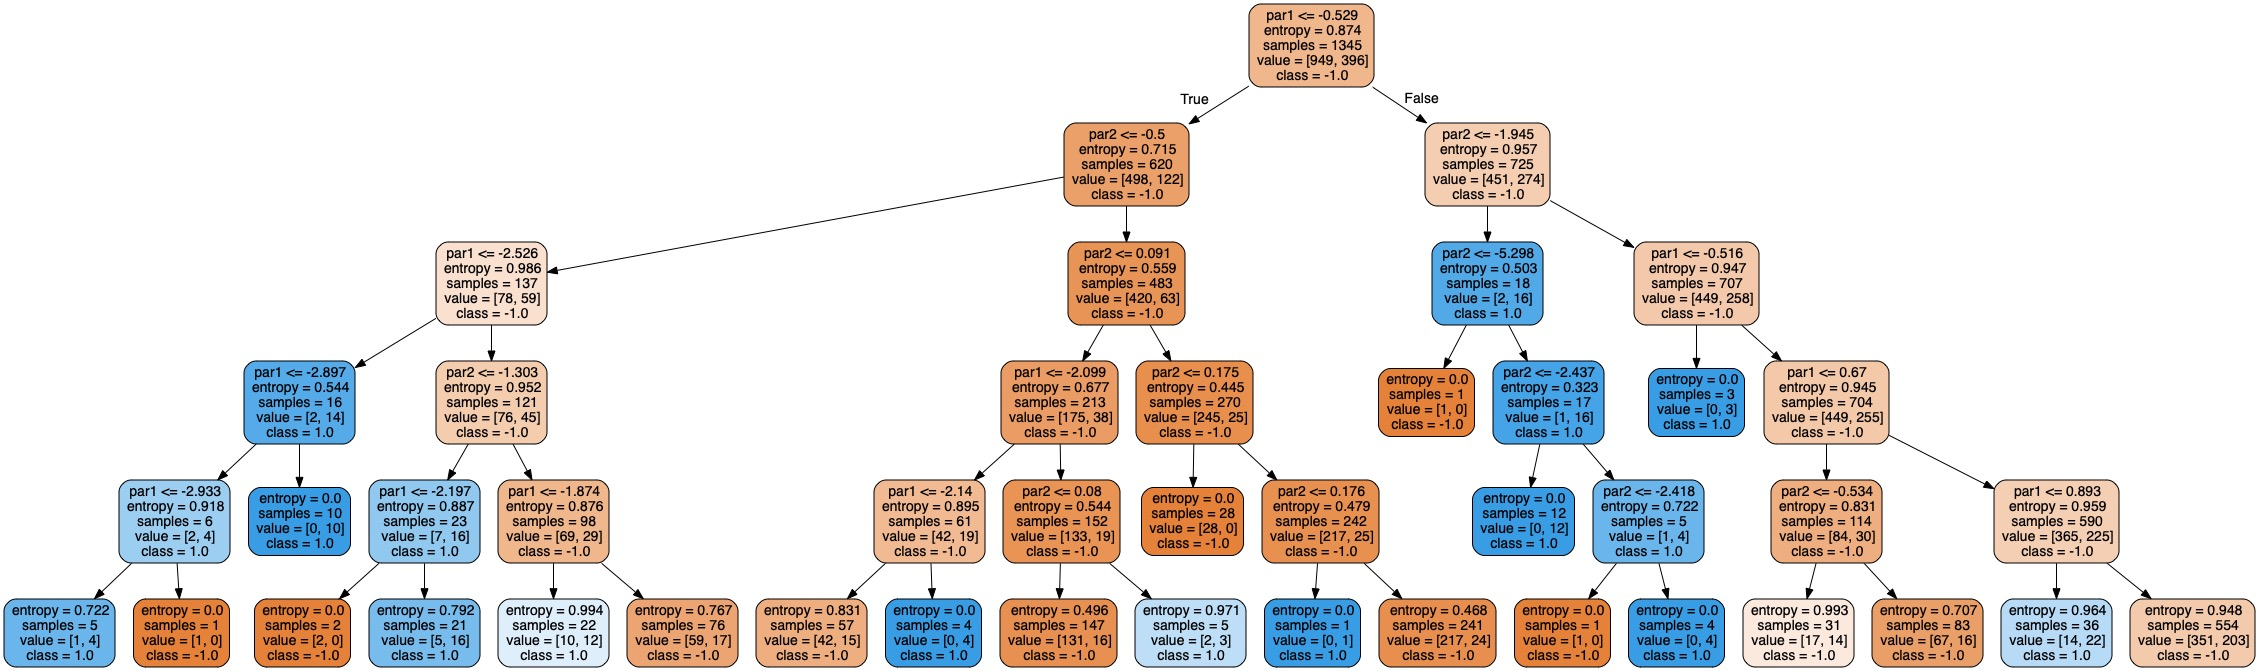

test size:  576 , total errors in test: 34.90%
index = predicted, columns = factual, in %:
         -1        1
-1  61.1111  30.0347
 1  4.86111  3.99306


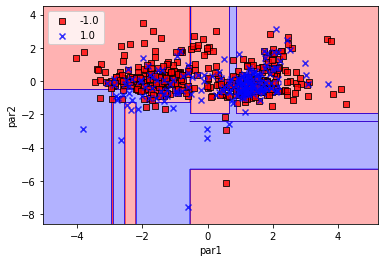

In [150]:
ppn = ds.divide_frame(pca_df,['par1','par2'],'Transported',classifier = 'Tree',criterion_tree = "entropy", depth = 5, random_state_sample = 1,random_state_ppn = 2, fraction = 0.7,plot = True,res = 0.02)

In [158]:
main_pca = (eigen_pairs[i][1][:,np.newaxis] for i in range(9))

w_tree = np.hstack(main_pca)
print('Матрица W for tree:\n', w_tree)

Матрица W for tree:
 [[ 1.58295248e-01  5.14574917e-01  2.96218816e-02 -4.18529893e-01
   4.12490064e-01  2.11459114e-01  8.95889961e-02  5.47396250e-01
  -2.71856232e-02]
 [ 9.70314825e-02  5.56610155e-01 -4.29519141e-01  3.10144827e-01
   3.32605041e-01 -3.35795298e-01  2.65142149e-02 -4.15820517e-01
   2.55827692e-02]
 [-2.49574443e-01  3.04602412e-01  2.40614188e-01  4.31860815e-02
  -3.69620000e-01 -4.79111941e-01  3.23483047e-01  2.20047306e-01
  -4.90897812e-01]
 [ 3.18542296e-01 -5.83464085e-04  1.00982880e-01  7.90640171e-02
   2.65283880e-02 -2.37320031e-03 -6.44330922e-01 -2.83886889e-02
  -6.36426152e-01]
 [-1.23617506e-01 -5.48266107e-01 -4.20465481e-01 -9.77923924e-02
   4.57950734e-01 -3.19707152e-01  1.95808806e-01  2.20384466e-01
  -3.09129261e-01]
 [ 2.20525801e-01 -5.11609499e-02  2.34913388e-01 -6.30618684e-01
   5.26590027e-02 -1.11831536e-01  2.93428713e-01 -5.91196332e-01
  -1.38020201e-01]
 [ 2.58318336e-01 -5.35237659e-03 -2.44517557e-01  3.03380412e-01
  -1.84

<ipython-input-158-235ad2d8d15d>:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  w_tree = np.hstack(main_pca)


In [159]:
X_pca_tree = X_std.dot(w_tree)
pca_df_tree = pd.DataFrame(X_pca_tree,index = dz.index,columns = ['par'+str(i) for i in range (9)])
pca_df_tree["Transported"] = y

pca_df_tree.head(20)

,par0,par1,par2,par3,par4,par5,par6,par7,par8,Transported
0,1.266179,-0.047298,-0.579537,-0.484662,-0.679699,-0.197474,-0.291669,0.855680,1.234242,-1.0
2,3.372752,2.392148,0.111757,-1.017663,2.372951,-1.639580,0.614152,-1.781231,0.100047,-1.0
3,2.066801,-0.814268,0.986651,-0.334346,0.366902,-0.701361,0.441418,-0.297063,0.672968,-1.0
11,1.725925,-0.022979,-0.549128,-0.546907,-0.181030,-0.254296,-1.689471,1.117815,-0.560164,1.0
12,-1.244262,-0.543579,-0.966748,-0.402022,-0.295878,-0.121255,-0.285978,0.358585,0.735752,1.0
25,-0.878466,-0.274022,-0.405402,0.146127,-1.507221,-0.685342,-0.238422,0.014063,0.747554,-1.0
28,1.389562,-0.182867,-0.237625,-0.561150,-0.749877,-0.152405,-1.407312,0.041152,-0.259270,-1.0
29,-1.252067,0.725405,-0.294069,-0.676096,-0.701742,-0.138396,-0.090834,0.846648,0.520731,-1.0
31,-0.982499,-0.025503,-1.147779,-0.766319,0.183518,0.294129,0.215494,1.087810,0.356644,1.0
34,-0.947144,-0.166100,-0.283586,-0.177980,-1.366714,-0.582111,-0.387044,-0.266789,0.591196,-1.0


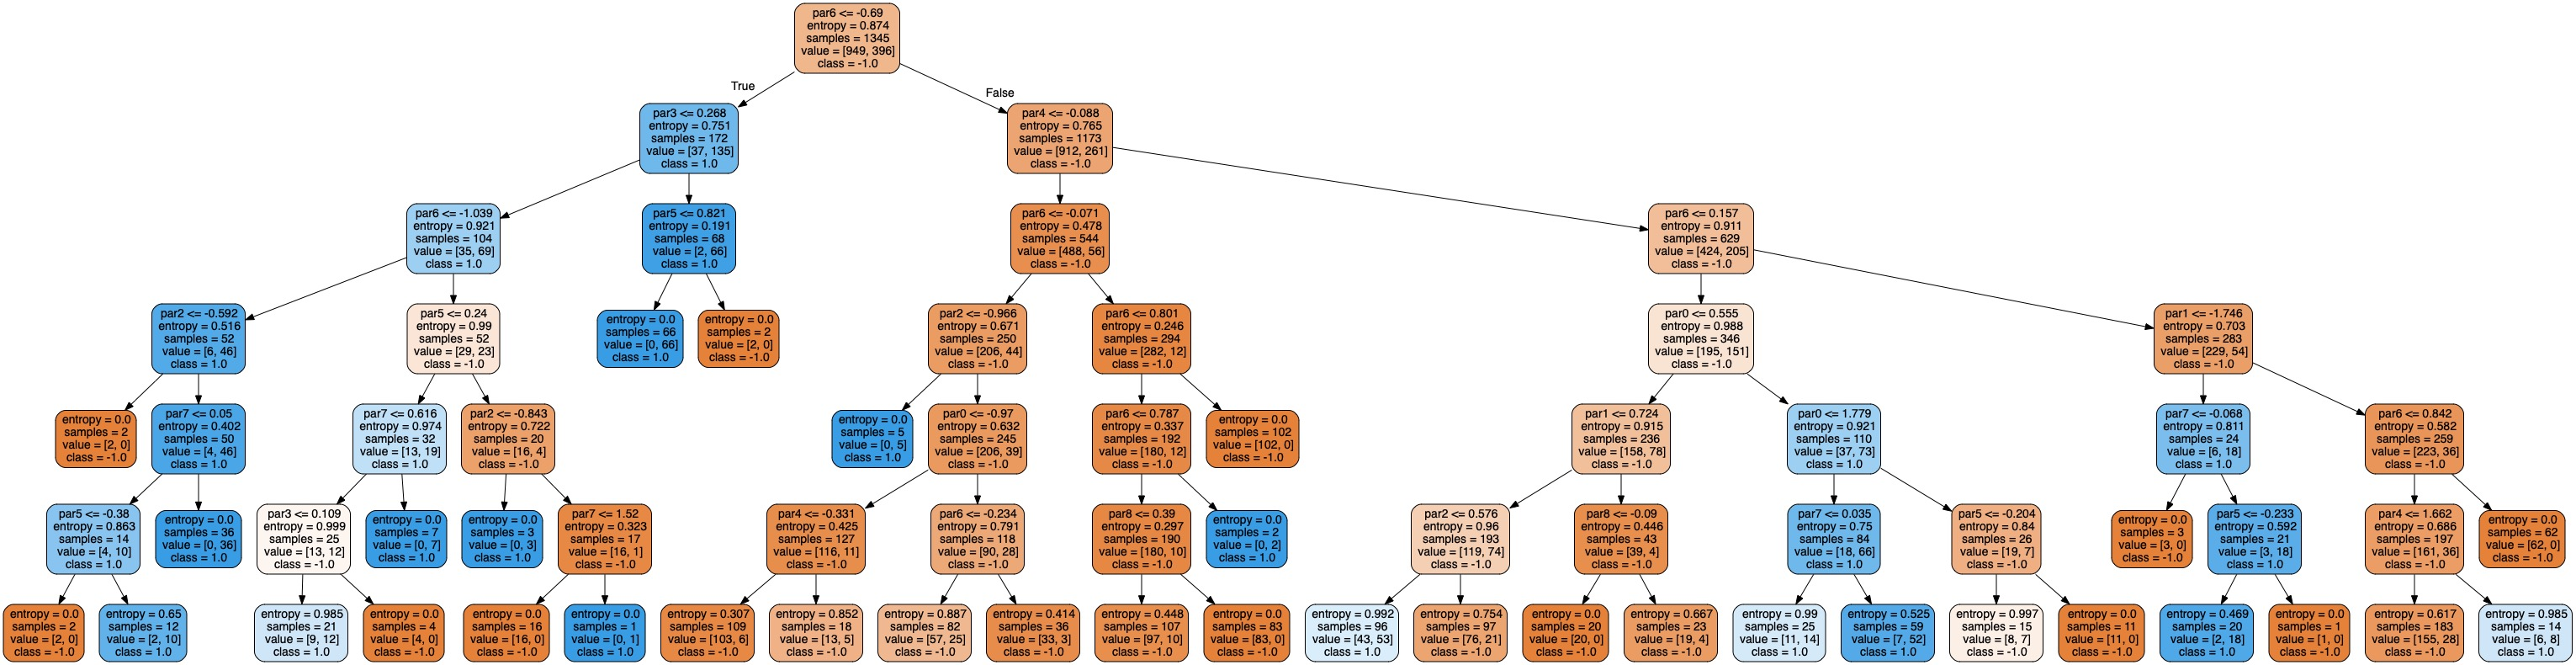

test size:  576 , total errors in test: 23.26%
index = predicted, columns = factual, in %:
         -1        1
-1  54.5139  11.8056
 1  11.4583  22.2222


In [186]:
ppn = ds.divide_frame(pca_df_tree,['par'+str(i) for i in range (9)],'Transported',classifier = 'Tree',criterion_tree = "entropy", depth = 6, random_state_sample = 9,random_state_ppn = 2, fraction = 0.7,plot = False,res = 0.02)

In [187]:
error_percentage = 100*(0.22*1921 + 1519*0.04 + 103*0.01)/3542
print('Ошибок%: ',error_percentage)

Ошибок%:  13.676171654432524
